<a href="https://colab.research.google.com/github/ChacoGolden/Stat-Data-Science/blob/main/Final_VIF_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd

In [14]:
merged_data = pd.read_csv('https://raw.githubusercontent.com/ChacoGolden/Stat-Data-Science/refs/heads/main/Panel_Data_Inc_Edu_Infl_Wm_Hh_Age_Urb.csv')

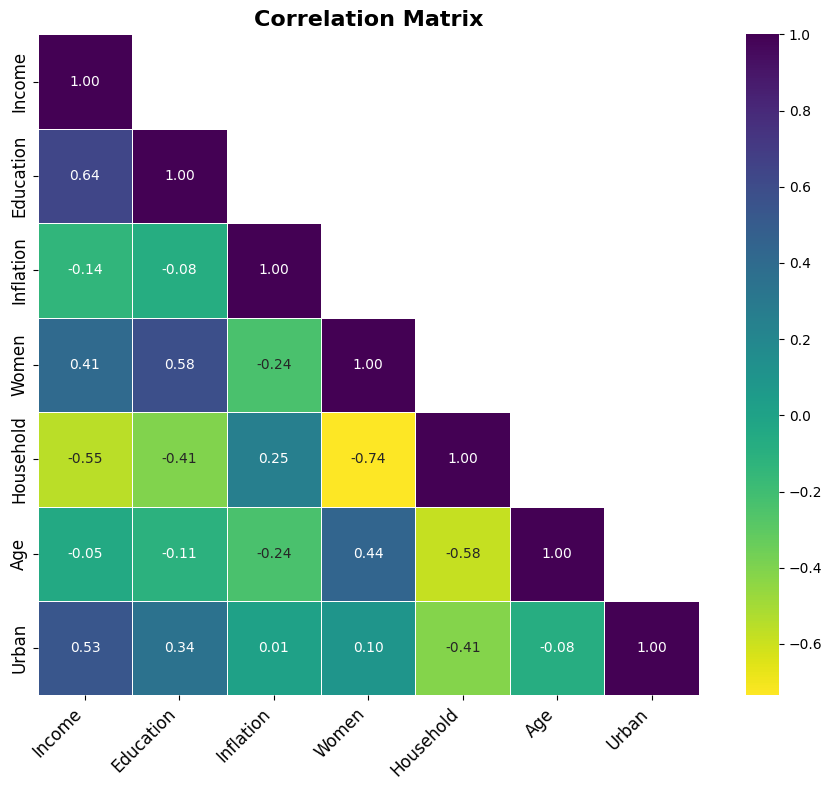

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Select the control variables
controls = merged_data[['Income', 'Education', 'Inflation', 'Women', 'Household', 'Age', 'Urban']]

# Compute the correlation matrix
correlation_matrix = controls.corr()

# Create a mask for the upper triangle, excluding the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Create a heatmap with the reversed color scale and mask
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    mask=mask,  # Mask the upper triangle but keep the diagonal
    annot=True,
    fmt='.2f',
    cmap='viridis_r',  # Reversed color scale
    cbar=True,
    square=True,
    linewidths=0.5,  # Adds light grid lines for visual separation
    annot_kws={"size": 10}  # Annotation text size
)
plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


The correlation matrix reveals several interesting relationships among the variables. Overall, most correlations are moderate or low, indicating limited multicollinearity, which is favorable for our regression analysis.

Notable correlations include a strong positive relationship between Income and Education (0.64), suggesting that higher income levels are often associated with better education. Additionally, Household and Women exhibit a notable negative correlation (-0.74), which could indicate an inverse association between household size and the proportion of women in the workforce. Meanwhile, Urban positively correlates with Income (0.53), implying that urbanization aligns with higher income. These insights are valuable for understanding variable interdependencies in the regression context.

In [17]:
import statsmodels.api as sm  # Importing statsmodels
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select the control variables
controls = merged_data[['Education', 'Inflation', 'Women', 'Household', 'Age', 'Urban']]

# Add a constant column for VIF calculation
controls_with_const = sm.add_constant(controls)

# Calculate VIF for each variable
vif_data = pd.DataFrame({
    'Variable': controls_with_const.columns,
    'VIF': [variance_inflation_factor(controls_with_const.values, i) for i in range(controls_with_const.shape[1])]
})

# Drop the constant term from the table
vif_data = vif_data[vif_data['Variable'] != 'const']

# Display the VIF table in Colab
print(vif_data)

    Variable       VIF
1  Education  2.300937
2  Inflation  1.094791
3      Women  3.749746
4  Household  4.437729
5        Age  2.348155
6      Urban  1.832418


Variance Inflation Factor (VIF) quantifies how much multicollinearity (correlation among predictors) inflates the variance of regression coefficients. A VIF below 5 is typically considered acceptable, indicating limited multicollinearity.

In our results:

All VIFs are below 5, suggesting that multicollinearity is not a significant concern.
The highest VIF is for Household (4.44), which warrants some attention but is still within acceptable limits.
Other variables, like Inflation (1.09) and Urban (1.83), show minimal multicollinearity risk.
These findings support the reliability of the regression model estimates.